# SME0828 - Introdução à Ciência de Dados (2020)


### Projeto: Classificaçãoaulo, São Carlos, Brasil.
#### Professor:
Francisco Aparecido Rodrigues, francisco@icmc.usp.br.
#### Alunos:
Luiz Gustavo Ribeiro - 5967710 <br>
Pedro Stefanelli - 8531272 <br>
Diego Talarico - 3166561

### Exercício 2

No classificar não-paramétrico, verifique o efeito do hiperparâmetro h na classificação dos dados de
diabetes, encontrando seu melhor valor:
https://www.kaggle.com/uciml/pima-indians-diabetes-database


In [4]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib.pyplot import cm

color=['red', 'blue', 'gray', 'black', 'green', 'lightblue']

random.seed(42)
data = pd.read_csv('data/diabetes.csv', header=(0))

classes = np.array(pd.unique(data[data.columns[-1]]), dtype=int)

# Converte para matriz e vetor do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]



In [10]:
def transformer(X,y):
    # Transforma os dados para terem media igual a zero e variancia igual a 1
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    # Seleciona os conjuntos de treinamento e teste
    p = 0.8 # fraction of elements in the test set
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = p, random_state = 42)
    
    return X_train, X_test, y_train, y_test


def BayesianoNaoParametrico(X_train, X_test, y_train, y_test, classes, h):
    P = pd.DataFrame(data=np.zeros((X_train.shape[0], len(classes))), columns = classes) 
    Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
    for i in np.arange(0, len(classes)): # Para cada classe
        element = tuple(np.where(y_train == classes[i])) # elementos na classe i
        element = element[0]
        Pc[i] = len(element)/len(y_train) # Probabilidade pertencer a classe i
        Z = X_train[element,:] # Elementos no conjunto de treinamento
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
        for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
            x = X_test[j,:]
            x = x.reshape((1,len(x)))
            # calcula a probabilidade pertencer a cada classe
            pj = np.exp(kde.score_samples(x)) 
            P[classes[i]][j] = pj*Pc[i]

    y_pred = [] # Vetor com as classes preditas
    for i in np.arange(0, X_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred)
    # calcula a acuracia
    score = accuracy_score(y_pred, y_test)
#   print('Acuracia:', score)
    return score




score_BNaoParametrico: [0.6428571428571429, 0.6688311688311688, 0.7467532467532467, 0.7012987012987013, 0.6558441558441559, 0.6428571428571429]


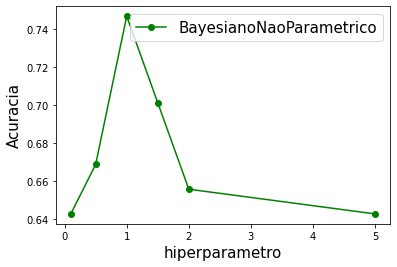

In [11]:

score_BNaoParametrico = []

vh = [0.1, 0.5, 1, 1.5, 2, 5, ]
for h in vh:
    X_train, X_test, y_train, y_test = transformer(X , y)
    score_BNaoParametrico.append(BayesianoNaoParametrico(X_train, X_test, y_train, y_test, classes, h))
print("\nscore_BNaoParametrico:" ,score_BNaoParametrico)



# BayesianoParametrico
plt.plot(vh, score_BNaoParametrico, 'go-',label='BayesianoNaoParametrico')
plt.xlabel('hiperparametro', fontsize = 15)
plt.ylabel('Acuracia',fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)  

#### O hiperparâmetro h = 1.5 apresentou a melhor acurácia (acc = 0.73)